<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Taylor Operators and Numerical Differentiation</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
---

This exercise covers the following aspects:

* Use the Taylor series to calculate finite-difference operators
* Learn how to define high-order finite-difference operators
* Demonstrate the accuracy improvement by testing the operators on (arbitrary) functions

---

## Basic Equations

The Taylor expansion of $f(x + dx)$ around $x$ is defined as 

$$
f(x+dx)=\sum_{n=0}^\infty \frac{f^{(n)}(x)}{n!}dx^{n}  
$$


Finite-difference operators can be calculated by seeking weights (here: $a$, $b$, $c$) with which function values have to be multiplied to obtain an interpolation or a derivative. Example:

$$
\begin{align}
a ~ f(x + dx) & \ = \ a ~ \left[ ~  f(x) +  f^{'} (x) dx +  \frac{1}{2!}  f^{''} (x) dx^2   + \dotsc  ~ \right] \\
b ~ f(x) & \  = \ b ~ \left[ ~  f(x)  ~ \right] \\
c ~ f(x - dx) & \ = \ c ~ \left[ ~  f(x) -  f^{'} (x) dx +  \frac{1}{2!}  f^{''} (x) dx^2   - \dotsc  ~ \right]
\end{align}
$$

This can  be expressed in matrix form by comparing coefficients, here seeking a 2nd derivative

$$
\begin{align}
&a  ~~+~~            ~~~~b           &+~~  c & = & 0 \\
&a  ~~\phantom{+}~~ \phantom{b}  &-~~  c & = & 0 \\
&a  ~~\phantom{+}~~ \phantom{b}  &+~~  c & = & \frac{2!}{\mathrm{d}x^2}
\end{align}
$$

which leads to 

$$
\begin{pmatrix}
  1 & 1 & 1 \\
  1 & 0 & -1 \\
  1 & 0 & 1
 \end{pmatrix}
\begin{pmatrix}
  a\\
 b \\
 c
 \end{pmatrix}
 =
 \begin{pmatrix}
  0\\
 0 \\
 \frac{2!}{dx^2}
 \end{pmatrix}
$$

and using matix inversion we obtain 

$$
\begin{pmatrix}
a \\
b\\
c
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{2 \mathrm{d}x^2} \\
 - \frac{2}{2 \mathrm{d}x^2} \\
  \frac{1}{2 \mathrm{d}x^2}
\end{pmatrix}
$$

This is the the well known 3-point operator for the 2nd derivative. This can easily be generalized to higher point operators and higher order derivatives. Below you will find a routine that initializes the system matrix and solves for the Taylor operator. 

---

## Calculating the Coefficients

The subroutine `central_difference_coefficients()` initalizes the system matrix and solves for the difference weights assuming $dx=1$. It calculates the centered differences using an arbitrary number of coefficients, also for higher derivatives. 

It returns a central finite difference stencil of order `points` for the `n`th derivative.

In [1]:
%matplotlib inline


import math
import numpy as np


def central_difference_coefficients(points, n):
    """
    Calculate the central finite difference stencil for an arbitrary number
    of points and an arbitrary order derivative.
    
    :param points: The number of points for the stencil. Must be
        an odd number.
    :param n: The derivative order. Must be a positive number.
    """
    if not points % 2:
        raise ValueError("Only uneven number of points allowed.")
    if points <= n:
        raise ValueError("The %ith derivative requires at least %i points" %
                         (n, n + 2))
    a = points
    m = np.zeros((a, a))
    for i in range(a):
        for j in range(a):
            dx = j - a // 2
            m[i][j] = dx ** i
    
    s = np.zeros(a)
    s[n] = math.factorial(n)
    return np.linalg.solve(m, s)

---

## (Almost) Christmas

The coefficients quickly decay and yield diminishing returns for higher order stencils. Higher order derivatives naturally require longer stencils.

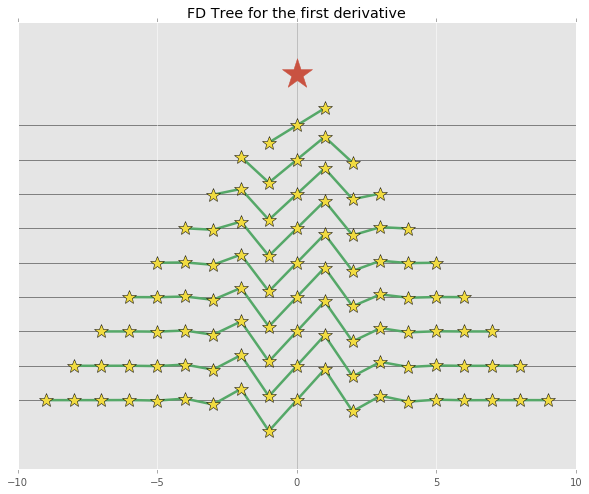

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

for _i, points in enumerate(range(3, 20, 2)):
    coeffs = central_difference_coefficients(points, 1)
    numbers = np.linspace(- (points // 2), points // 2, points)
    plt.plot(numbers, coeffs - _i * 1, color="#55A868", lw=2.5)
    plt.plot(numbers, coeffs - _i * 1, color="#F1DB40", lw=0, marker="*", markersize=15)
    plt.hlines(-(_i * 1), -100, 100, color="0.5", zorder=0)
    
plt.scatter([0], [1.5], marker="*", s=1000, color="#C95241")


plt.yticks([])
plt.vlines(0, *plt.ylim(), color="0.5", zorder=0)
plt.xlim(-(points // 2 + 1), points // 2 + 1)
plt.ylim(-(_i + 2), 3)
plt.title("FD Tree for the first derivative")
plt.show()

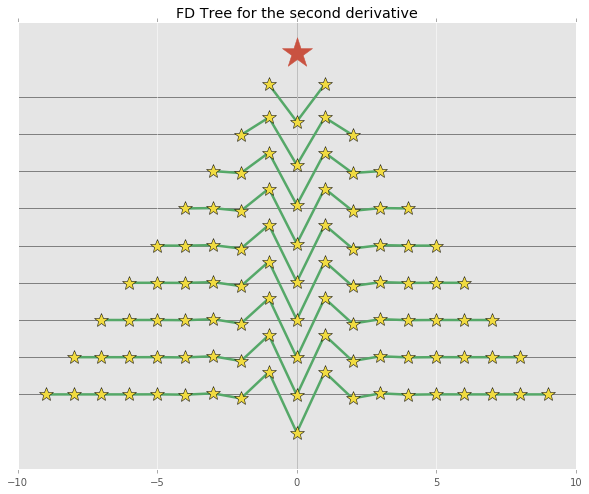

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

for _i, points in enumerate(range(3, 20, 2)):
    coeffs = central_difference_coefficients(points, 2)
    numbers = np.linspace(- (points // 2), points // 2, points)
    plt.plot(numbers, coeffs - _i * 3, color="#55A868", lw=2.5)
    plt.plot(numbers, coeffs - _i * 3, color="#F1DB40", lw=0, marker="*", markersize=15)
    plt.hlines(-(_i * 3), -100, 100, color="0.5", zorder=0)
    
plt.scatter([0], [3.5], marker="*", s=1000, color="#C95241")


plt.yticks([])
plt.vlines(0, *plt.ylim(), color="0.5", zorder=0)
plt.xlim(-(points // 2 + 1), points // 2 + 1)
plt.ylim(-(3 * _i + 2 * 3), 6)
plt.title("FD Tree for the second derivative")
plt.show()

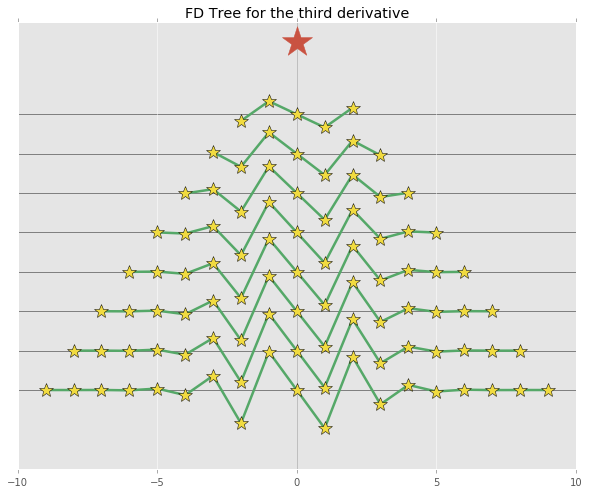

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

for _i, points in enumerate(range(5, 20, 2)):
    coeffs = central_difference_coefficients(points, 3)
    numbers = np.linspace(- (points // 2), points // 2, points)
    plt.plot(numbers, coeffs - _i * 3, color="#55A868", lw=2.5)
    plt.plot(numbers, coeffs - _i * 3, color="#F1DB40", lw=0, marker="*", markersize=15)
    plt.hlines(-(_i * 3), -100, 100, color="0.5", zorder=0)
    
plt.scatter([0], [5.5], marker="*", s=1000, color="#C95241")


plt.yticks([])
plt.vlines(0, *plt.ylim(), color="0.5", zorder=0)
plt.xlim(-(points // 2 + 1), points // 2 + 1)
plt.ylim(-(3 * _i + 2 * 3), 7)
plt.title("FD Tree for the third derivative")
plt.show()

---

## Accuracy of centered finite differences

Define a simple function, e.g. sine, cosine, gaussian, some polynomial, ..., differentiate it using the stencils returned from the above function and compare the result to the analytically calculated derivative.

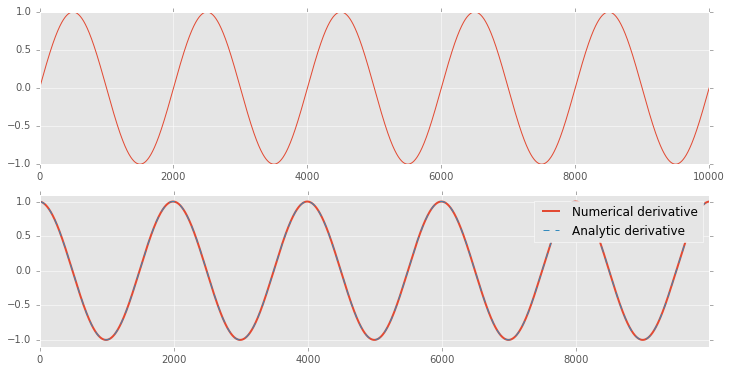

In [5]:
sine_curve = np.sin(np.linspace(0, 10 * np.pi, 10000))
dx = 10 * np.pi / 10000

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(sine_curve)

stencil = central_difference_coefficients(5, 1)

# Dummy application.
cosine_curve = np.zeros(len(sine_curve))
for _i in range(2, len(sine_curve) - 2):
    cosine_curve[_i] = stencil[0] * sine_curve[_i - 2] + stencil[1] * sine_curve[_i - 1] + \
        stencil[2] * sine_curve[_i] + stencil[3] * sine_curve[_i + 1] + \
        stencil[4] * sine_curve[_i + 2]
# Scale by dt.
cosine_curve /= dx

plt.subplot(212)
plt.plot(cosine_curve[10:-10], label="Numerical derivative", lw=2)
plt.plot(np.cos(np.linspace(0, 10 * np.pi, 10000))[10:-10], ls="--",
         label="Analytic derivative")
plt.ylim(-1.1, 1.1)
plt.xlim(0, 9980)
plt.legend()
plt.show()

### Exercise 2

This exercise aims to illustrate the accuracy gains by using longer finite difference stencils. To this end we define a helper function that takes an array of x values, an array of the function sampled at these values to differentiate, the analytical derivative, the length of the stencil, and the order of the derivative.

In [6]:
def diff_helper(x, data, analytical_diff, stencil_length, diff_order):
    plt.close()
    dx = x[1] - x[0]
    
    plt.figure(figsize=(12, 5))
    plt.subplot(311)
    # Be super conservative about edge effect.
    buf = stencil_length // 2 + 1
    x = x[buf:-buf]
    plt.plot(x, data[buf:-buf], label="Function")
    plt.legend()

    stencil = central_difference_coefficients(stencil_length, diff_order)

    # Its effectively a convolution. So use a pre-built convolution function.
    diff = np.convolve(data, stencil[::-1])
    diff /= dx ** diff_order
    diff = diff[stencil_length // 2: -(stencil_length // 2)]


    plt.subplot(312)
    plt.plot(x, diff[buf:-buf], label="Numerical derivative", lw=2)
    plt.plot(x, analytical_diff[buf:-buf], ls="--", label="Analytic derivative")
    plt.legend()
    
    plt.subplot(313)
    plt.plot(x, (diff - analytical_diff)[buf:-buf], label="Numerical - Analytical Derivative")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

This shows a simple usage example. Play around a bit to get a feel how the accuracy improves with higher order operators. Make sure the function is not too oversampled, otherwise the effect is naturally not very strong. Polynomials of degree $N-1$ are exactly differentiated (first derivatives) by central differences of order $\ge N$. The coefficients are derived from Taylor polynomials after all.

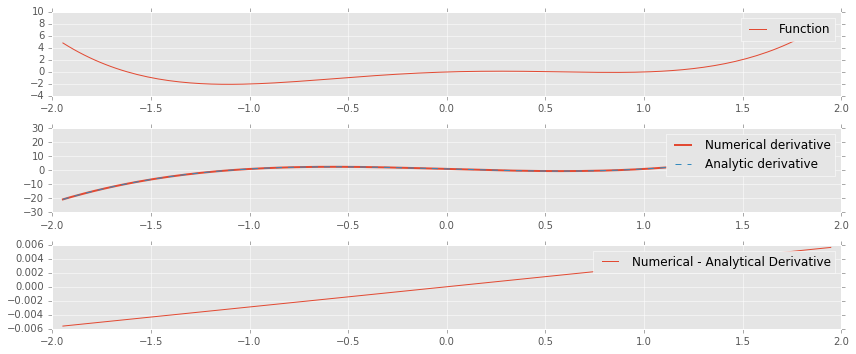

In [7]:
x = np.linspace(-2, 2, 150)
p = np.poly1d([1, 0, -2, 1, 0])
p_diff = np.poly1d([4, 0, -4, 1])
diff_helper(x, p(x), p_diff(x), 3, 1)

## Bonus: Theoretical Accuray

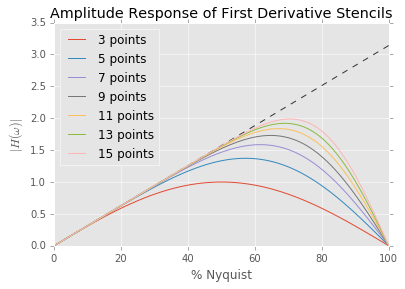

In [8]:
def H(N, omega):
    coeffs = central_difference_coefficients(N, 1)
    HH = np.zeros_like(omega)
    for _i, c in enumerate(coeffs):
        HH += c * np.sin((-(N // 2) + _i) * omega)
    return HH


omega = np.linspace(0.0, np.pi, 100)

f = omega / (2 * np.pi)

plt.plot(f * 200, omega, color='0.2', ls="--")
for _i in range(3, 17, 2):
    plt.plot(f * 200, H(_i, omega), label="%i points" % _i)
plt.legend(loc="upper left")
plt.xlabel("% Nyquist")
plt.ylabel("$|H(\omega)|$")
plt.title("Amplitude Response of First Derivative Stencils")
plt.show()

In [9]:
# Some tests against analytically calculated stencils. Not important for the exercises.

# f'(x) 5-point-stencil.
np.testing.assert_allclose(
    central_difference_coefficients(5, 1),
    np.array([-1.0 / 12.0, + 2.0 / 3.0, 0, -2.0 / 3.0, 1.0 / 12.0])[::-1],
    rtol=1E-8, atol=1E-10)

# f''(x) 5-point-stencil.
np.testing.assert_allclose(
    central_difference_coefficients(5, 2),
    np.array([-1.0 / 12.0, + 16.0 / 12.0, -30.0 / 12.0, 16.0 / 12.0, -1.0 / 12.0])[::-1],
    rtol=1E-8, atol=1E-10)

# f'''(x) 5-point-stencil.
np.testing.assert_allclose(
    central_difference_coefficients(5, 3),
    np.array([1.0 / 2.0, -1.0, 0, 1.0, -1.0 / 2.0])[::-1],
    rtol=1E-8, atol=1E-10)

# f''''(x) 5-point-stencil.
np.testing.assert_allclose(
    central_difference_coefficients(5, 4),
    np.array([1.0, -4.0, 6.0, -4.0, 1.0])[::-1],
    rtol=1E-8, atol=1E-10)